<a href="https://colab.research.google.com/github/Ilyaas189/CE888-Lab_Work/blob/main/Lab_08_Transfer_Learning_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [2]:
# Get all the paths
import os
data_dir_list = os.listdir('/content/data')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data"))
file_count = len(files)
print(file_count)

0


In [3]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/cats_and_dogs_hores_human_small'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'cats', fname)
    dst = os.path.join(train_dir, fname)
    # print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'cats', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'cats', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'dogs', fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
#
fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'dogs', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'dogs', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['horse-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'horses', fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'horses', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'horses', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['rider-{}.jpg'.format(i) for i in range(1,100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'Humans', fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'Humans', fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(150, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'Humans', fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
print('done')

done


In [6]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [7]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0
    else:
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3

In [8]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [9]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(train_y)
print(val_X.shape)
print(test_X.shape)

(396, 224, 224, 3)
[1 1 2 2 2 3 3 0 2 1 1 2 3 2 3 3 3 2 1 3 1 2 1 3 2 1 2 0 2 1 3 1 0 2 1 0 0
 2 2 0 3 3 0 2 0 1 2 3 2 1 3 2 3 0 3 3 3 0 1 3 1 3 1 0 0 0 2 2 0 3 0 1 1 3
 3 0 1 1 3 1 2 0 1 1 3 1 3 1 1 2 3 3 1 1 3 2 3 3 1 0 2 1 2 1 1 3 3 1 1 1 2
 1 0 3 3 3 0 0 0 2 0 0 3 3 0 2 0 2 2 1 3 2 3 1 1 1 1 1 2 0 3 2 0 0 2 2 2 1
 1 2 0 0 2 2 1 0 3 0 3 3 2 3 0 3 3 3 3 1 0 1 0 0 2 2 0 2 3 3 2 1 0 0 0 2 0
 1 0 3 1 0 1 3 2 2 3 1 3 2 1 2 2 2 1 1 1 1 2 1 3 1 3 2 0 0 0 3 2 3 1 1 3 1
 2 3 2 2 2 0 2 1 3 2 0 2 3 1 3 2 0 2 3 3 3 0 0 2 1 3 2 2 3 0 2 0 1 2 0 0 0
 1 1 3 0 0 3 1 2 3 0 3 2 2 1 0 0 0 2 0 0 3 3 3 1 3 0 1 0 1 3 0 3 0 1 1 3 2
 0 1 1 3 1 3 2 2 2 3 2 3 3 2 1 1 3 1 0 2 3 2 0 1 0 3 0 0 2 0 2 3 2 3 0 0 2
 3 0 1 1 0 0 1 2 0 0 3 3 3 2 1 1 2 3 1 1 2 1 1 3 0 3 3 2 2 0 0 2 0 2 0 0 2
 2 1 0 1 0 2 0 1 0 1 3 0 1 2 2 0 2 0 0 0 1 1 1 2 3 0]
(200, 224, 224, 3)
(208, 224, 224, 3)


In [10]:
## VGG 16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [11]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

574717952/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [12]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from keras.utils.np_utils import to_categorical
target=to_categorical(train_y)
val_target=to_categorical(val_y)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_FE_model.h5', save_best_only=True),
]

In [15]:
history = model.fit(train_X, target,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_target),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 40s 145ms/step - loss: 1.4403 - acc: 0.3838 - val_loss: 0.7939 - val_acc: 0.6850
Epoch 2/10
40/40 [==============================] - 4s 95ms/step - loss: 0.8271 - acc: 0.6552 - val_loss: 0.5587 - val_acc: 0.8250
Epoch 3/10
40/40 [==============================] - 4s 96ms/step - loss: 0.5999 - acc: 0.7573 - val_loss: 0.5028 - val_acc: 0.8350
Epoch 4/10
40/40 [==============================] - 4s 96ms/step - loss: 0.5366 - acc: 0.8069 - val_loss: 0.4718 - val_acc: 0.8300
Epoch 5/10
40/40 [==============================] - 4s 95ms/step - loss: 0.4768 - acc: 0.8400 - val_loss: 0.7557 - val_acc: 0.6300
Epoch 6/10
40/40 [==============================] - 4s 96ms/step - loss: 0.6266 - acc: 0.7429 - val_loss: 0.4880 - val_acc: 0.8100
Epoch 7/10
40/40 [==============================] - 4s 96ms/step - loss: 0.4672 - acc: 0.8243 - val_loss: 0.4185 - val_acc: 0.8350
Epoch 8/10
40/40 [==============================] - 4s 97ms/step - loss: 0.3446 -

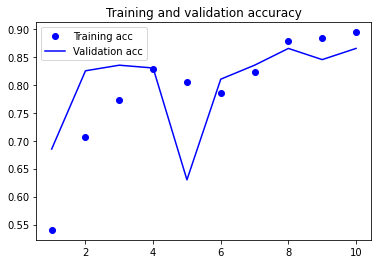

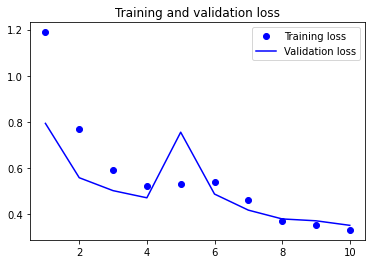

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
from sklearn.metrics import accuracy_score
test_target=to_categorical(test_y)
## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_target, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_target, ypred, average='weighted')

auc = roc_auc_score(test_target, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.8939393758773804
Val Accuracy:	 0.8650000095367432
Test Accuracy:	 0.3701923076923077
Precision:	 0.5998639429272908
Recall:		 0.9807692307692307
F1 Score:	 0.7390863868247178
AUC:		 0.8725961538461537
